In [1]:
%run base.ipynb
%load_ext autoreload
%autoreload 2

import gym
import matplotlib.pyplot as plt

from abides_gym_market_making_environment_v1 import *
from policies_v1 import SigPolicy, RNNPolicy, LSTMPolicy
from train_v1 import train
from train_v1_RNN import train as train_RNN
import utils

## Register the environment

In [2]:
# register market making env for gym use 
from gym.envs.registration import register

register(
    id="market-making-v1",
    entry_point=SubGymMarketsMarketMakingEnv_v1,
)

def generate_env(seed):
    """
    generates specific environment with the parameters defined and set the seed
    """
    env = gym.make(
            "market-making-v1",
            background_config="rmsc04",
            mkt_close="10:45:00",
            timestep_duration="10s",
            order_fixed_size=10,
            first_interval="00:10:00",
            observe_first_interval=True,
            max_inventory=100,
            mkt_order_alpha=0.2,
            terminal_inventory_reward=100,# reward
            inventory_reward_dampener=1., # 0.6,
            damp_mode="asymmetric",
            debug_mode=False
        )

    env.seed(seed)
    
    return env

# create the environment
env = generate_env(5)

## Signature policy

In [3]:
episodes = 100
lr = 0.001
window_length = None
eps = 0.25
#eps_decay = utils.linear_decay(epochs=20_000, start=eps, end=0.1)

sigpolicy = SigPolicy(env, 3)
sigpolicy.initialize_parameters(factor=1, zero_bias=True)

results = train(env, 
                sigpolicy, 
                episodes,
                discount=0.99,
                learning_rate=lr, 
                exploration="softmax",
                epsilon=eps,
                #epsilon_decay=eps_decay,
                window_length=window_length, 
                printing=False)

  0%|          | 0/100 [00:00<?, ?it/s]
 Episode 0 | step 100 | reward -4.0 | loss 1.5344057666126565
Q values: tensor([ 0.0435, -0.0942, -0.0116,  0.0536], grad_fn=<SelectBackward>)

 Episode 0 | step 200 | reward -34.34 | loss 20.65900047814291
Q values: tensor([-0.2246, -0.2823, -0.2194, -0.1141], grad_fn=<SelectBackward>)

 Episode 0 | step 300 | reward -94.84999999999997 | loss 67.34918324923076
Q values: tensor([-0.7963, -0.7520, -0.8213, -0.9155], grad_fn=<SelectBackward>)

 Episode 0 | step 361 | reward -161.41999999999993 | loss 125.93175482021327
Q values: tensor([-0.6727, -0.4846, -0.5998, -0.7754], grad_fn=<SelectBackward>)
  1%|          | 1/100 [00:21<35:34, 21.56s/it]
 Episode 1 | step 400 | reward -6.855 | loss 2.5114367327275406
Q values: tensor([-0.1043, -0.0665, -0.1036, -0.1371], grad_fn=<SelectBackward>)

 Episode 1 | step 500 | reward -69.84500000000001 | loss 50.35426342615423
Q values: tensor([-0.1866,  0.0284, -0.0720, -0.3279], grad_fn=<SelectBackward>)

 Epis

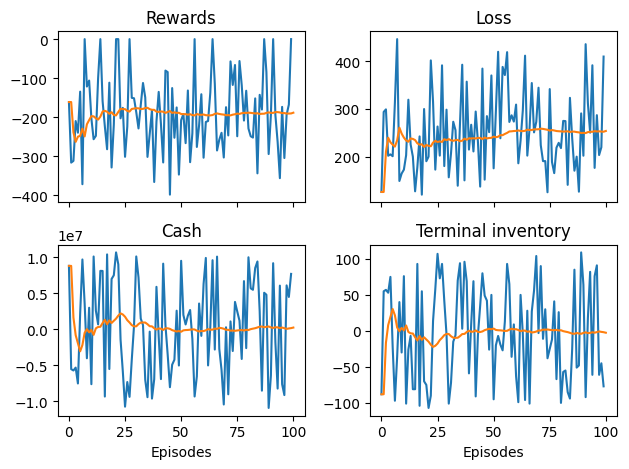

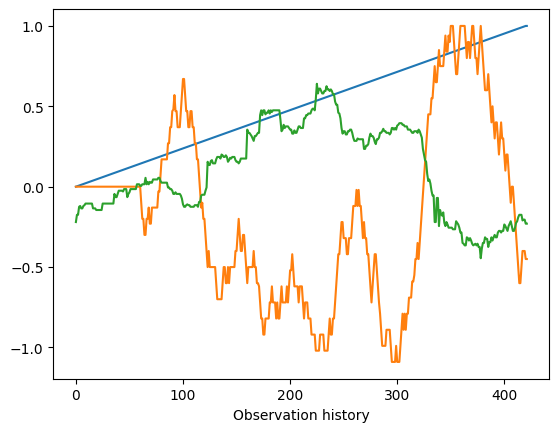

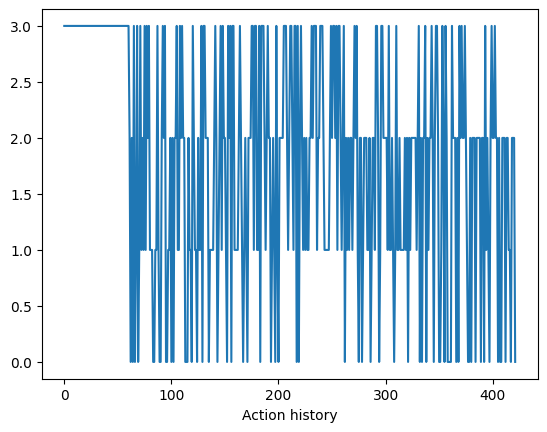

In [12]:
#plt.plot(results["inventories"][-1])

#plt.plot([x if abs(x) < 1000 else 0 for x in results["rewards"]])
#plt.plot(results["rewards"][20:23])
#plt.scatter(results["terminal_inventory"],
#            [reward if abs(reward) < 200 else 0 for reward in results["rewards"]])
utils.plot_results([
    #results["rewards"],
    [x if abs(x) < 400 else 0 for x in results["rewards"]],
    #results["losses"],
    [x if abs(x) < 2000 else 200 for x in results["losses"]],
    results["cash"],
    results["terminal_inventory"],
])

id = -2

observation_history = list(results["observations"][id])
plt.plot(observation_history)
plt.xlabel("Observation history")
plt.show()

plt.plot(results["actions"][id])
plt.xlabel("Action history")
plt.show()


[190.3674536156691, 4514291.852936157, 401.7821124885245, 314.6351002073634, 172.7960137533555]


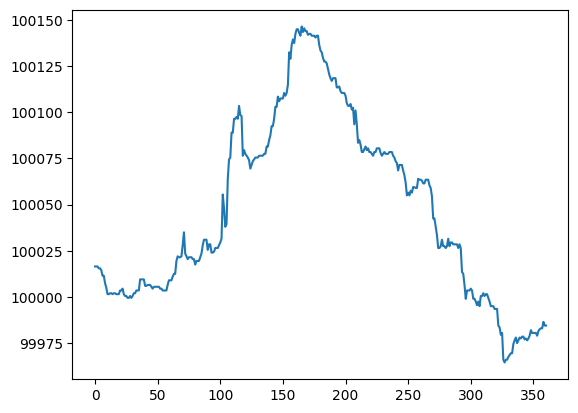

In [11]:
print(results["losses"][20:25])
plt.plot(results["mid_prices"][1])

In [ ]:
# results_reduced_100_runs_0804_1  # without inventory reward
# results_reduced_50_runs_0804_2  # with inventory reward
# results_reduced_50_runs_0804_3 # with inventory reward and correct epsilon decay


import pickle

"""
# write results 
with open('../results/results_reduced_50_runs_0804_3.pkl', 'wb') as f:  # open a text file
    pickle.dump(results, f) # serialize the list
f.close()
"""

# load results
with open('../results/results_reduced_100_runs_0804_1.pkl', 'rb') as f:
    results = pickle.load(f)
f.close()




## RNN / LSTM policy

In [ ]:
# create the environment
env = generate_env(5)

episodes = 200
lr = 0.01
window_length = None
eps = 0.9
eps_decay = utils.linear_decay(epochs=65_000, start=eps, end=0.01)

rnnpolicy = LSTMPolicy(env, 2)
env.close()
results = train_RNN(env, 
                rnnpolicy, 
                episodes,
                discount=0.97,
                learning_rate=lr, 
                epsilon=eps,
                epsilon_decay=eps_decay,
                window_length=window_length, 
                printing=False)

In [ ]:
#plt.plot(results["actions"][0])
plt.plot([(x - 100_00)/1000 for x in results["cash"]])
plt.plot([reward if reward < 400 else 0 for reward in results["losses"]])

"""
plt.plot([x * 20 for x in results["actions"][-1][-50:]])
plt.plot(results["inventories"][-1][-50:])
hist = np.array(results["history"])
plt.plot([(x - hist[-50,2])* 100_000 for x in hist[-50:,2]])
"""

In [ ]:
plt.plot(hist[:,2])